Датасет: US Consumer Finance Complaints
https://www.kaggle.com/datasets/kaggle/us-consumer-finance-complaints

In [3]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

# Читаем только первые 5,000 строк
df = pd.read_csv(filename, nrows=5000)


Saving consumer_complaints.csv to consumer_complaints.csv


In [36]:
correct_column_name = 'product'

selected_products = [
    'Credit reporting', 'Debt collection', 'Mortgage',
    'Credit card', 'Bank account or service'
]

filtered_df = df[df[correct_column_name].isin(selected_products)].copy()
print(f"Отфильтровано строк: {len(filtered_df)} из {len(df)}")

Отфильтровано строк: 4654 из 5000


In [39]:
# Обрабатываем столбец issue
filtered_df['issue_clean'] = filtered_df['issue'].fillna('').astype(str)

In [40]:
filtered_df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id', 'issue_clean'],
      dtype='object')

**Задача**: Многоклассовая классификация текстовых жалоб потребителей на финансовые продукты/услуги

**Цель**: Разработать модель машинного обучения, которая автоматически определяет категорию финансового продукта на основе текстового описания жалобы потребителя.

In [24]:
df.shape

(5000, 18)

In [6]:
filtered_df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
5,08/30/2013,Credit card,NaN,Application processing delay,NaN,NaN,NaN,Capital One,NY,12206,NaN,NaN,Phone,09/03/2013,Closed with explanation,Yes,Yes,510098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10/31/2013,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,NaN,NaN,Discover,FL,33173,NaN,NaN,Web,10/31/2013,Closed with explanation,Yes,No,579329
4996,10/24/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Nationstar Mortgage,IL,60614,NaN,NaN,Web,10/23/2013,Closed with explanation,Yes,Yes,571304
4997,10/02/2013,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,Wells Fargo & Company,FL,33487,NaN,NaN,Web,10/03/2013,Closed with explanation,Yes,No,550708
4998,10/15/2013,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,"Aspire Financial, Inc.",TX,75115,Older American,NaN,Web,11/15/2013,Closed with monetary relief,Yes,No,559389


# 2. Анализ

0: '**date_received**' - Дата получения жалобы

1: '**product**' - Продукт/Услуга

2: '**sub_product**' - Подкатегория продукта

3: '**issue**' - Проблема/Вопрос

4: '**sub_issue**' - Подкатегория проблемы

5: '**consumer_complaint_narrative**' - Описание жалобы потребителя

6: '**company_public_response**' - Публичный ответ компании

7: '**company**' - Компания

8: '**state**' - Штат

9: '**zipcode**' - Почтовый индекс

10: '**tags**' - Метки/Теги

11: '**consumer_consent_provided**' - Согласие потребителя предоставлено

12: '**submitted_via**' - Способ подачи жалобы

13: '**date_sent_to_company**' - Дата отправки компании

14: '**company_response_to_consumer**' - Ответ компании потребителю

15: '**timely_response**' - Своевременный ответ

16: '**consumer_disputed**?' - Оспорено потребителем?

17: '**complaint_id**' - ID жалобы

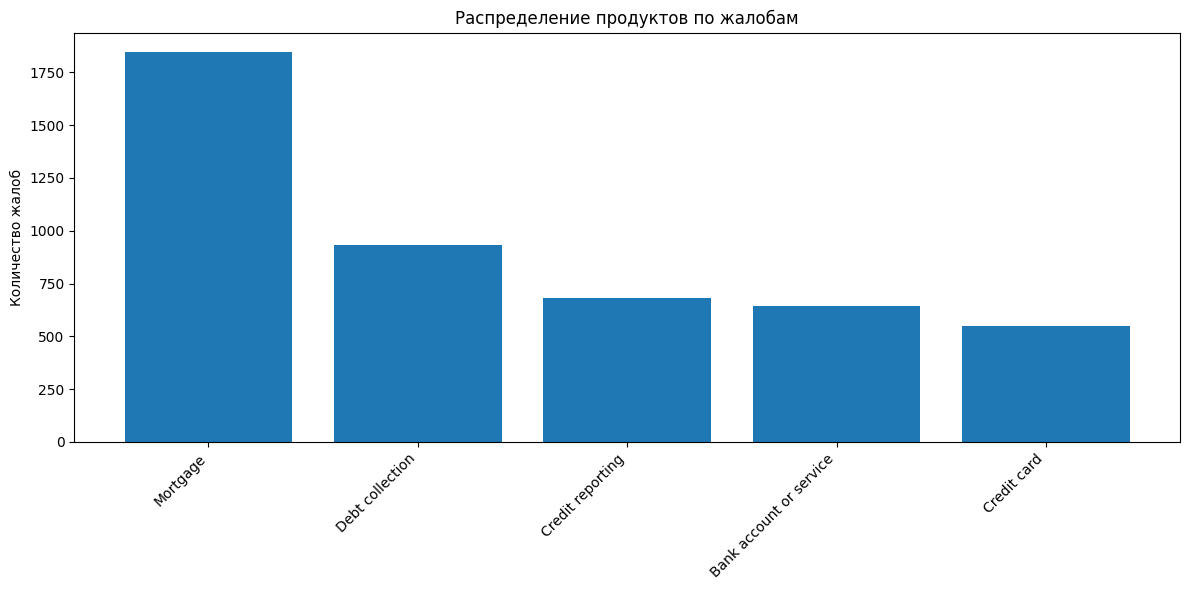


Распределение по продуктам:
product
Mortgage                   1846
Debt collection             931
Credit reporting            683
Bank account or service     646
Credit card                 548
Name: count, dtype: int64


In [139]:
# Распределение целевой переменной (product)
plt.figure(figsize=(12, 6))
product_counts = filtered_df['product'].value_counts()
plt.bar(product_counts.index, product_counts.values)
plt.title('Распределение продуктов по жалобам')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество жалоб')
plt.tight_layout()
plt.show()

print("\nРаспределение по продуктам:")
print(product_counts)

In [138]:
filtered_df['consumer_complaint_narrative'].dtype

dtype('float64')

In [32]:
filtered_df.isnull()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
2,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
5,False,False,True,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,True,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
4996,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
4997,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
4998,False,False,False,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False


In [37]:
filtered_df.isna().sum()

,0
date_received,0
product,0
sub_product,1231
issue,0
sub_issue,3040
consumer_complaint_narrative,4654
company_public_response,4654
company,0
state,8
zipcode,8


### Очень много пропущенных значений в consumer_complaint_narrative. Будем использовать для определения продукта issue

In [41]:
# Анализ issue по продуктам
print("\nСамые частые issues по продуктам:")
for product in selected_products:
    product_issues = filtered_df[filtered_df['product'] == product]['issue_clean'].value_counts().head(3)
    print(f"\n{product}:")
    for issue, count in product_issues.items():
        print(f"  - {issue}: {count}")

print(type_counts)


Самые частые issues по продуктам:

Credit reporting:
  - Incorrect information on credit report: 450
  - Credit reporting company's investigation: 121
  - Unable to get credit report/credit score: 52

Debt collection:
  - Cont'd attempts collect debt not owed: 374
  - Communication tactics: 210
  - Disclosure verification of debt: 145

Mortgage:
  - Loan modification,collection,foreclosure: 963
  - Loan servicing, payments, escrow account: 592
  - Application, originator, mortgage broker: 147

Credit card:
  - Billing disputes: 97
  - Other: 68
  - Identity theft / Fraud / Embezzlement: 51

Bank account or service:
  - Account opening, closing, or management: 269
  - Deposits and withdrawals: 210
  - Problems caused by my funds being low: 76
consumer_complaint_narrative
str    4654
Name: count, dtype: int64


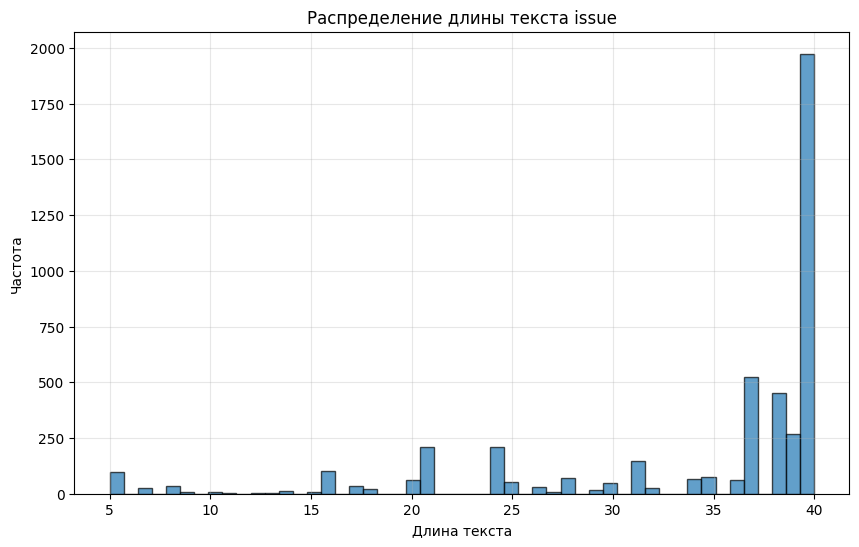

In [42]:
# Длина текста issue
filtered_df['issue_length'] = filtered_df['issue_clean'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['issue_length'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение длины текста issue')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.show()

In [43]:
print(f"\nСтатистика длины issue:")
print(f"Средняя длина: {filtered_df['issue_length'].mean():.2f} символов")
print(f"Медианная длина: {filtered_df['issue_length'].median():.2f} символов")
print(f"Стандартное отклонение: {filtered_df['issue_length'].std():.2f} символов")


Статистика длины issue:
Средняя длина: 34.23 символов
Медианная длина: 38.00 символов
Стандартное отклонение: 8.81 символов


# 3. Разбиение на обучающию и тестовую выборки

In [121]:
X = filtered_df.drop(['product', 'date_received', 'date_sent_to_company', 'consumer_complaint_narrative', 'company_public_response', 'consumer_consent_provided', 'tags'], axis=1)
y = filtered_df['product']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(3490, 1164)

In [123]:
X_train.isna().sum()

,0
sub_product,906
issue,0
sub_issue,2282
company,0
state,8
zipcode,8
submitted_via,0
company_response_to_consumer,0
timely_response,0
consumer_disputed?,0


In [124]:
X_test.isna().sum()

,0
sub_product,325
issue,0
sub_issue,758
company,0
state,0
zipcode,0
submitted_via,0
company_response_to_consumer,0
timely_response,0
consumer_disputed?,0


In [126]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[['sub_product', 'sub_issue', 'state', 'zipcode' ]])

SimpleImputer(strategy='most_frequent')

In [127]:
X_train[['sub_product', 'sub_issue', 'state', 'zipcode']] = imp_cat.transform(X_train[['sub_product', 'sub_issue', 'state', 'zipcode']])

In [128]:
X_train.isna().sum()

,0
sub_product,0
issue,0
sub_issue,0
company,0
state,0
zipcode,0
submitted_via,0
company_response_to_consumer,0
timely_response,0
consumer_disputed?,0


# Бинаризация:

In [130]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['state','company','submitted_via', 'timely_response']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [132]:
dummies = pd.DataFrame(enc.transform(X_train[['state','company','submitted_via', 'timely_response']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,state_AE,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,...,company_Windham Professionals,company_Zions Bancorporation,company_Zwicker & Associates,submitted_via_Email,submitted_via_Fax,submitted_via_Phone,submitted_via_Postal mail,submitted_via_Referral,submitted_via_Web,timely_response_Yes
3513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [134]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['state','company','submitted_via', 'timely_response'], axis=1)

In [120]:
X_train.head()

,sub_product,issue,sub_issue,company,state,zipcode,submitted_via,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,issue_clean,issue_length
3513,Checking account,Deposits and withdrawals,NaN,TCF National Bank,IL,60641,Web,Closed with explanation,Yes,No,558555,Deposits and withdrawals,24
2758,Other mortgage,"Loan modification,collection,foreclosure",NaN,Nationstar Mortgage,ME,04005,Web,Closed with explanation,Yes,No,538707,"Loan modification,collection,foreclosure",40
3986,(CD) Certificate of deposit,"Account opening, closing, or management",NaN,Wells Fargo & Company,NJ,08067,Web,Closed with explanation,Yes,Yes,559014,"Account opening, closing, or management",39
2221,NaN,Other,NaN,Capital One,AZ,85382,Web,Closed with explanation,Yes,No,587182,Other,5
1123,VA mortgage,"Loan modification,collection,foreclosure",NaN,Nationstar Mortgage,SC,29456,Web,Closed with explanation,Yes,No,512666,"Loan modification,collection,foreclosure",40


Нужно еще сделать векторизацию для product и применить метод TF-IDF для текстового issue_clean, после чего можно будет применять kNN